# Improving Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

## Import DataStandardScaler

In [54]:
test = pd.read_csv('../datasets/test.csv')

train_clean = pd.read_csv('../datasets/train_clean.csv')
test_clean = pd.read_csv('../datasets/test_clean.csv')

X_train = pd.read_csv('../datasets/X_train.csv')
y_train = pd.read_csv('../datasets/y_train.csv')
X_test = pd.read_csv('../datasets/X_test.csv')
y_test = pd.read_csv('../datasets/y_test.csv')

sample = pd.read_csv('../datasets/sample_sub_reg.csv')

### Basline Prediction will be based off of Ground Living Area. A simple linear regression with the square footage of the house is the single best predictor, so any improvement made on that is considered a success. 

In [66]:
slr = LinearRegression()

X = train_clean[['gr_liv_area']]
y = train_clean['saleprice']

slr.fit(X,y)

slr.score(X,y)

0.5174936126630603

- R2 value shows that Ground Living Area explains about 50% of the variability in predicting sale price.

### Curent MLR Model Score

In [3]:
explore = [
    'neighborhood', 
    'paved_drive',
    'gr_liv_area',
    'overall_qual',
    'garage_area',
    'total_bsmt_sf',
    'year_built',
    'year_remod_add',
    'mas_vnr_area',
    'fireplaces',
    'bsmtfin_sf_1',
    'central_air']

In [4]:
X = train_clean[explore]
y = train_clean['saleprice']

In [5]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

mlr.score(X_train, y_train), mlr.score(X_test, y_test)

(0.8752067233853532, 0.8838115691876284)

## Vizualize the residuals

In [6]:
preds = mlr.predict(X_train)

In [7]:
residuals = y_train - preds

In [8]:
residuals[:5]

,saleprice
0,-2573.308138
1,11687.615862
2,13781.525444
3,-5971.500836
4,-12666.599488


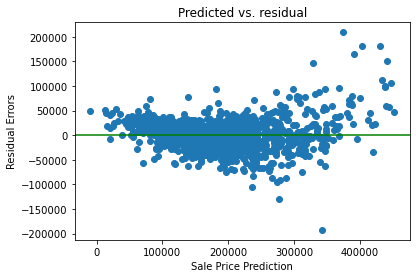

In [74]:
fig, ax = plt.subplots()

plt.scatter(preds, residuals)
plt.axhline(0, color='green')
plt.title('Predicted vs. residual')
plt.xlabel('Sale Price Prediction')
plt.ylabel('Residual Errors')
plt.savefig('../images/predicted_vs_residuals');

- low and high valued houses are underprices(predicted less than what they are), whereas the majority of houses are slightly overpriced (predicted higher than they are).
- The residuals are fairly consistant in varaince(Exept for a minority of expensive houses), so the assumption of even varaince is sufficient to make inferences.

## Using StandarScalar to normalize the data and fit to a Multiple Linear Regression

In [9]:
ss_mlr_pipe = Pipeline([
    ('ss', StandardScaler()),
    ('mlr', LinearRegression())
])

ss_mlr_pipe.fit(X_train, y_train)

print('Train set R-squared value: ', ss_mlr_pipe.score(X_train, y_train), '\n')
print('Test set R-squared value: ', ss_mlr_pipe.score(X_test, y_test), '\n')
print('Intercept: ', ss_mlr_pipe['mlr'].intercept_, '\n')

Train set R-squared value:  0.8752067216701609 

Test set R-squared value:  0.8838124360379913 

Intercept:  [180322.27011014] 



## Regularize with Lasso

In [38]:
ss_lasso_pipe = Pipeline([
    ('ss', StandardScaler()),
    ('lasso', Lasso(max_iter=5_000))
])

ss_lasso_pipe.fit(X_train, y_train)

print('Train set R-squared value: ', ss_lasso_pipe.score(X_train, y_train), '\n')
print('Test set R-squared value: ', ss_lasso_pipe.score(X_test, y_test), '\n')
print('Intercept: ', ss_lasso_pipe['lasso'].intercept_, '\n')
pd.DataFrame(zip(X_train.columns, ss_lasso_pipe['lasso'].coef_))

Train set R-squared value:  0.8752067184544402 

Test set R-squared value:  0.8838107236985275 

Intercept:  [180322.2026862] 



,0,1
0,paved_drive,-1176.364090
1,gr_liv_area,23906.038107
2,overall_qual,19398.228606
3,garage_area,8086.704475
4,total_bsmt_sf,9148.642604
5,year_built,7273.391408
6,year_remod_add,7373.921630
7,mas_vnr_area,6219.880533
8,fireplaces,4390.271917
9,bsmtfin_sf_1,10756.828884


#### - The only reduced feature is the neighborhood blmngtn

In [11]:
ss_lasso_pipe.get_params()

{'memory': None,
 'steps': [('ss', StandardScaler()), ('lasso', Lasso(max_iter=5000))],
 'verbose': False,
 'ss': StandardScaler(),
 'lasso': Lasso(max_iter=5000),
 'ss__copy': True,
 'ss__with_mean': True,
 'ss__with_std': True,
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 5000,
 'lasso__normalize': 'deprecated',
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': None,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False}

## Regularize with Ridge

In [12]:
ss_ridge_pipe = Pipeline([
    ('ss', StandardScaler()),
    ('ridge', Ridge())
])

ss_ridge_pipe.fit(X_train, y_train)

print('Train set R-squared value: ', ss_ridge_pipe.score(X_train, y_train), '\n')
print('Test set R-squared value: ', ss_ridge_pipe.score(X_test, y_test), '\n')
print('Intercept: ', ss_ridge_pipe['ridge'].intercept_, '\n')
#pd.DataFrame(zip(X_train, ss_ridge_pipe['ridge'].coef_))
ss_ridge_pipe['ridge'].coef_

Train set R-squared value:  0.8752066477322655 

Test set R-squared value:  0.8838229167491605 

Intercept:  [180322.2026862] 



array([[-1.17209619e+03,  2.38879369e+04,  1.93807973e+04,
         8.09083399e+03,  9.15358612e+03,  7.26146392e+03,
         7.37683071e+03,  6.22379935e+03,  4.39788601e+03,
         1.07493270e+04, -9.57960488e+02, -4.01537506e+02,
        -1.27273614e+03, -2.86182751e+03,  1.22462336e+03,
        -2.94458810e+01, -9.14354582e+02,  2.94310330e+03,
        -1.29646946e+03, -1.08991634e+03, -6.35222919e+02,
         2.23721987e+03, -6.48879596e+02, -5.71027384e+02,
        -1.40939397e+03, -1.02680247e+03, -1.63560298e+03,
        -1.80138168e+03, -3.56060089e+03,  2.60273563e+03,
         7.14858889e+03, -1.36984636e+03, -5.71044775e+02,
        -2.86609694e+02, -2.07177564e+03,  7.16546401e+02,
         7.48610640e+03,  5.83120032e+01,  1.23733547e+00]])

## Regularize with ElasticNet

In [13]:
ss_en_pipe = Pipeline([
    ('ss', StandardScaler()),
    ('en', ElasticNet())
])

ss_en_pipe.fit(X_train, y_train)

print('Train set R-squared value: ', ss_en_pipe.score(X_train, y_train), '\n')
print('Test set R-squared value: ', ss_en_pipe.score(X_test, y_test), '\n')
print('Intercept: ', ss_en_pipe['en'].intercept_, '\n')
pd.DataFrame(zip(X_train, ss_en_pipe['en'].coef_))[:10]
#ss_en_pipe['en'].coef_

Train set R-squared value:  0.8587957479696271 

Test set R-squared value:  0.8720802636643222 

Intercept:  [180322.2026862] 



,0,1
0,paved_drive,652.541180
1,gr_liv_area,16413.967594
2,overall_qual,14093.304812
3,garage_area,8791.737758
4,total_bsmt_sf,9611.318180
5,year_built,5732.425955
6,year_remod_add,7296.038275
7,mas_vnr_area,6995.739306
8,fireplaces,6122.433837
9,bsmtfin_sf_1,7658.428254


## Grid Search to test hyper parameters on model performance

### Lasso

In [26]:
lasso_parameter = {'lasso__alpha': [1, 275, 276, 277, 278, 279, 280], 'lasso__max_iter': [10_000, 20_000]}

In [27]:
ss_lasso_pipe.get_params()

{'memory': None,
 'steps': [('ss', StandardScaler()), ('lasso', Lasso())],
 'verbose': False,
 'ss': StandardScaler(),
 'lasso': Lasso(),
 'ss__copy': True,
 'ss__with_mean': True,
 'ss__with_std': True,
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__normalize': 'deprecated',
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': None,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False}

In [28]:
ss_lasso_pipe = Pipeline([
    ('ss', StandardScaler()),
    ('lasso', Lasso())
])

grid_search = GridSearchCV(ss_lasso_pipe, param_grid=lasso_parameter, cv=5, verbose=1)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [1, 275, 276, 277, 278, 279, 280],
                         'lasso__max_iter': [10000, 20000]},
             verbose=1)

In [29]:
print('Train set R-squared value: ', grid_search.score(X_train, y_train))
print('Test set R-squared value: ', grid_search.score(X_test, y_test), '\n')
print('Best Score: ', grid_search.best_score_)
print('Best Parameters: ', grid_search.best_params_, '\n')
print('Best Score on test data: ', grid_search.score(X_test, y_test))

Train set R-squared value:  0.874864668515747
Test set R-squared value:  0.8833627311246904 

Best Score:  0.8652977091104882
Best Parameters:  {'lasso__alpha': 277, 'lasso__max_iter': 10000} 

Best Score on test data:  0.8833627311246904


In [30]:
cross_val_score(grid_search, X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits


array([0.84956645, 0.87893542, 0.87205984, 0.87394363, 0.85198295])

In [31]:
cross_val_score(grid_search, X_test, y_test)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


C:\Users\brice\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.121e+08, tolerance: 1.999e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\brice\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.120e+08, tolerance: 1.999e+08
  model = cd_fast.enet_coordinate_descent(


Fitting 5 folds for each of 14 candidates, totalling 70 fits


C:\Users\brice\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.236e+08, tolerance: 1.512e+08
  model = cd_fast.enet_coordinate_descent(


Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits


C:\Users\brice\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.717e+08, tolerance: 1.593e+08
  model = cd_fast.enet_coordinate_descent(


array([0.79527616, 0.87197991, 0.88071044, 0.89286595, 0.90037814])

### Ridge

In [32]:
ridge_parameter = {'ridge__alpha': [50, 52, 53, 54, 55, 57], 'ridge__max_iter': [10_000, 20_000]}

In [33]:
ss_ridge_pipe.get_params()

{'memory': None,
 'steps': [('ss', StandardScaler()), ('ridge', Ridge())],
 'verbose': False,
 'ss': StandardScaler(),
 'ridge': Ridge(),
 'ss__copy': True,
 'ss__with_mean': True,
 'ss__with_std': True,
 'ridge__alpha': 1.0,
 'ridge__copy_X': True,
 'ridge__fit_intercept': True,
 'ridge__max_iter': None,
 'ridge__normalize': 'deprecated',
 'ridge__positive': False,
 'ridge__random_state': None,
 'ridge__solver': 'auto',
 'ridge__tol': 0.001}

In [34]:
ss_ridge_pipe = Pipeline([
    ('ss', StandardScaler()),
    ('ridge', Ridge())
])

grid_search = GridSearchCV(ss_ridge_pipe, param_grid=ridge_parameter, cv=5, verbose=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [50, 52, 53, 54, 55, 57],
                         'ridge__max_iter': [10000, 20000]},
             verbose=1)

In [35]:
print('Train set R-squared value: ', grid_search.score(X_train, y_train))
print('Test set R-squared value: ', grid_search.score(X_test, y_test), '\n')
print('Best Score: ', grid_search.best_score_)
print('Best Parameters: ', grid_search.best_params_, '\n')
print('Best Score on test data: ', grid_search.score(X_test, y_test))

Train set R-squared value:  0.8750195861407428
Test set R-squared value:  0.8841796238558857 

Best Score:  0.8652731122188693
Best Parameters:  {'ridge__alpha': 54, 'ridge__max_iter': 10000} 

Best Score on test data:  0.8841796238558857


In [36]:
cross_val_score(grid_search, X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


array([0.84955179, 0.87734147, 0.87115734, 0.87454732, 0.85379675])

In [37]:
cross_val_score(grid_search, X_test, y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


array([0.81695299, 0.86222715, 0.8879101 , 0.88914464, 0.90178235])